In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures


In [26]:
master_df = pd.read_csv('../processed_data/google_data/master_df_counties.csv')

In [27]:
master_df['county_st'] = master_df['county'].astype(str) + ', ' + master_df['state'].astype(str)
master_df.head()

,state,county,date,retail,grocery and pharmacy,parks,transit stations,workplaces,residential,cases,deaths,county_st
0,Alabama,Baldwin County,2020-02-15,17.0,12.0,55.0,8.0,6.0,-2.0,0.0,0.0,"Baldwin County, Alabama"
1,Alabama,Baldwin County,2020-02-16,8.0,8.0,-12.0,7.0,-3.0,2.0,0.0,0.0,"Baldwin County, Alabama"
2,Alabama,Baldwin County,2020-02-17,9.0,9.0,31.0,7.0,-3.0,1.0,0.0,0.0,"Baldwin County, Alabama"
3,Alabama,Baldwin County,2020-02-18,7.0,8.0,21.0,7.5,2.0,0.0,0.0,0.0,"Baldwin County, Alabama"
4,Alabama,Baldwin County,2020-02-19,12.0,9.0,41.0,8.0,3.0,-1.0,0.0,0.0,"Baldwin County, Alabama"


Text(0, 0.5, 'cases')

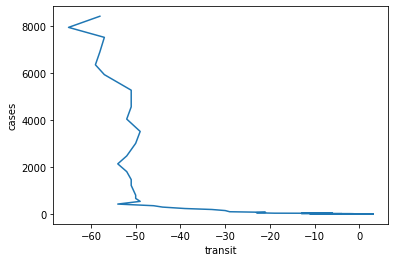

In [4]:
county_state = 'Los Angeles County, California'

county_st_idx = np.where(master_df['county_st'] == county_state)[0]
# t is decrease, y is cases
old_t = master_df['transit stations'][county_st_idx]
old_y = master_df['cases'][county_st_idx]
plt.plot(old_t,old_y)
plt.xlabel('transit')
plt.ylabel('cases')

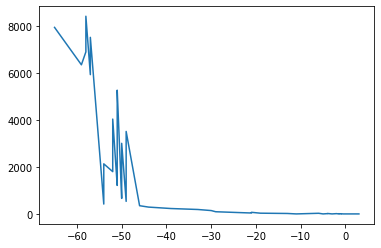

In [5]:
# the above isn't really a function, let's sort by transit decrease to smooth it out a little bit 
new_y = [x for _,x in sorted(zip(old_t,old_y))]
new_t = sorted(old_t)
plt.plot(new_t,new_y)

In [6]:
X = np.array(new_t)
y = np.array(new_y)
# have to make the X values positive 
if X[0] < 0:
    shiftamt = abs(X[0])
    X_shift = X+shiftamt
    
else:
    shiftamt = 0 
    X_shift = X


/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


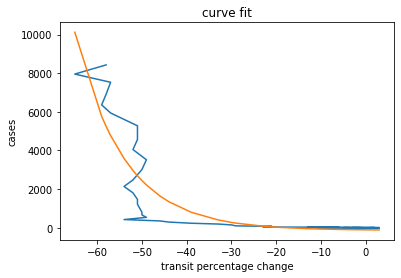

In [7]:
from scipy.optimize import curve_fit

#Define your function
#def func(x, a, b, c):
#    return a*np.exp(-b*x) + c
def func(x, a, b, c):
    return a*b**(x)+c


# Using the python scipy function curve_fit with function and input variables
popt, pcov = curve_fit(func, X_shift, y)
#plt.plot(X_shift-shiftamt,y,X_shift-shiftamt, func(X_shift,popt[0],popt[1],popt[2]))
plt.plot(old_t, old_y, X_shift-shiftamt,func(X_shift,popt[0],popt[1],popt[2]))
plt.title('curve fit')
plt.xlabel('transit percentage change')
plt.ylabel('cases')
plt.show()

In [28]:
# find a relationship between exponential coefficient a and the reaction time. 
# once I can do this, I can create just shift my model by however much I want to decrease/increase reaction time 
# but then I can generate the exact same curve from the coefficients found earlier. 

# TAKE THE DIFFERENCE OF USER INPUT REACTION TIME AND SUBTRACT IT WITH OUR CURRENT REACTION TIME 
# WHAT IF I REACTED 10 DAYS SOONER?? 

# SO I MUST HAVE A RELATIONSHIP between reaction time and coefficients

# graph coefficients over rea
#Define your function
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

# create a function to do what I did above 
def fit_cases_transit(county_state): 
    county_st_idx = np.where(master_df['county_st'] == county_state)[0]
    if (len(county_st_idx)) != 56: 
        return None, None, None
    old_t = master_df['transit stations'][county_st_idx]
    old_y = master_df['cases'][county_st_idx]
    y = np.array([x for _,x in sorted(zip(old_t,old_y))])
    t = np.array(sorted(old_t))
    
    
    # have to make the X values positive 
    if t[0] < 0:
        shiftamt = abs(t[0])
        t_shift = t+shiftamt

    else:
        shiftamt = 0 
        t_shift = t
    # Using the python scipy function curve_fit with function and input variables
    popt, pcov = curve_fit(func, X_shift, y, maxfev=5000)
    #plt.plot(X_shift-shiftamt,y,X_shift-shiftamt, func(X_shift,popt[0],popt[1],popt[2]))
    #plt.plot(old_t, old_y, X_shift-shiftamt,func(X_shift,popt[0],popt[1],popt[2]))
    
    return popt[0],popt[1],popt[2]

In [29]:
unique_county_st = master_df['county_st'].unique()
parameters = fit_cases_transit('Baldwin County, Alabama')
print(parameters)

(68.22217264461806, 0.09866201409423786, -0.7159290849172818)


/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


In [10]:
# stores all of the parameters
a_list = []
b_list = [] 
c_list = []
valid_st = [] 
for county_st in unique_county_st:
    a,b,c = fit_cases_transit(county_st)
    if a != None: 
        valid_st.append(county_st) 
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)


/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]
/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: RuntimeWarning: invalid value encountered in multiply
  pcov = pcov * s_sq


In [11]:
parameters_df = pd.DataFrame([valid_st, a_list,b_list,c_list]).T
parameters_df.columns = ['county', 'a', 'b','c']

In [12]:
parameters_df.head()

,county,a,b,c
0,"Baldwin County, Alabama",68.2222,0.098662,-0.715929
1,"Butler County, Alabama",2.31521,0.0569936,-0.110467
2,"Chambers County, Alabama",209.655,0.11305,-3.0474
3,"Chilton County, Alabama",27.6701,0.0761347,-0.688579
4,"Cleburne County, Alabama",9.21079,0.0396384,-0.879003


In [13]:
reaction_df = pd.read_csv('../processed_data/google_data/county_gr_rt_transit.csv')

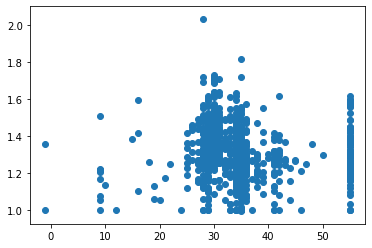

In [14]:
plt.scatter(reaction_df['reaction_time'],reaction_df['growth_rate'])

In [15]:
county_to_reaction=dict(zip(reaction_df['county'], reaction_df['reaction_time'])) 

In [16]:
parameters_df.insert(4, 'reaction_time', parameters_df['county'].map(county_to_reaction))

In [17]:
parameters_df = parameters_df.dropna() # TODO not sure if this is the only thing we canz do 
valid_st = parameters_df['county'].unique()

In [18]:
b = np.array(parameters_df['b'])
reaction = np.array(parameters_df['reaction_time'])

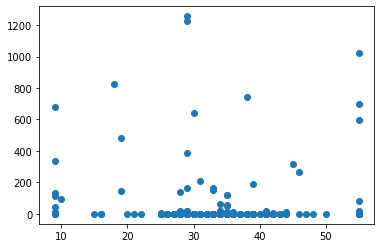

In [19]:
plt.scatter(reaction,b)

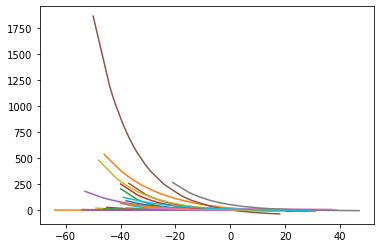

In [20]:
# lets see what they all look like 
i = 0
plot_num = 30
for county_st in valid_st: 
    county_st_idx = np.where(master_df['county_st'] == county_st)[0]
    old_t = master_df['transit stations'][county_st_idx]
    old_y = master_df['cases'][county_st_idx]
    y = np.array([x for _,x in sorted(zip(old_t,old_y))])
    t = np.array(sorted(old_t))
    # have to make the X values positive, so we shift
    if t[0] < 0:
        shiftamt = abs(t[0])
        t_shift = t+shiftamt

    else:
        shiftamt = 0 
        t_shift = t
    # Using the python scipy function curve_fit with function and input variables
    # find the parameters
    _, a, b, c, reaction_time = parameters_df.iloc[np.where(parameters_df['county']\
                                                           == county_st)[0][0]].values
    
    plt.plot(X_shift-shiftamt, func(X_shift,a,b,c))
    i+=1
    if i == plot_num:
        break

In [21]:
# now that we have parameters for everything, let's try do an example 
county_st = 'Los Angeles County, California'
_, a, b, c, reaction_time = parameters_df.iloc[np.where(parameters_df['county'] == county_st)[0][0]].values
county_st_idx = np.where(master_df['county_st'] == county_st)[0]

old_t = master_df['transit stations'][county_st_idx]
old_y = master_df['cases'][county_st_idx]
# the above isn't really a function, let's sort by transit decrease to smooth it out a little bit 
new_y = [x for _,x in sorted(zip(old_t,old_y))]
new_t = sorted(old_t)

In [22]:
t = [6,4,3,2,1,-1,2,-12]
last = min(t)
ret = np.ones(len(t))*last
#ret[reaction_change:] = t[-reaction_change:]
#ret[reaction_change:] = t[-reaction_change:]
#t[2:] # 3,2,1,-1,2,-12
ret[:len(t)-2] = t[2:]
ret

array([  3.,   2.,   1.,  -1.,   2., -12., -12., -12.])

In [23]:
def reaction(t, reaction_change): # pass in an unsorted t, and then sort when its all done
    # given a current t 
    if reaction_change == 0:
        return sorted(t)
    elif reaction_change > 0: 
        ret = np.zeros(len(t)) # no reaction 
        ret[-(len(t)-2):] = t[:len(t)-2]
        return sorted(ret)
    else: # TODO: ACTUAL FORECASTING INTO THE FUTURE 
        # last element of the array 
        last = min(t)
        ret = np.ones(len(t))*last
        ret[:len(t)-2] = t[2:]
        return sorted(ret)
        
        
test =np.array([1,3,2,1,-1,-2,-3,-15,-20])
reaction(test, -5)

[-20.0, -20.0, -20.0, -15.0, -3.0, -2.0, -1.0, 1.0, 2.0]

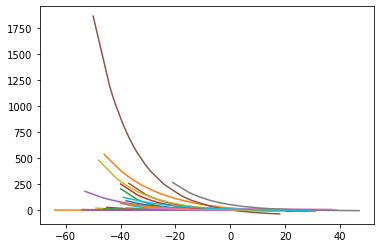

In [24]:
# lets see what they all look like 
i = 0
plot_num = 30
for county_st in valid_st: 
    county_st_idx = np.where(master_df['county_st'] == county_st)[0]
    old_t = master_df['transit stations'][county_st_idx]
    old_y = master_df['cases'][county_st_idx]
    y = np.array([x for _,x in sorted(zip(old_t,old_y))])
    t = np.array(sorted(old_t))
    # have to make the X values positive 
    if t[0] < 0:
        shiftamt = abs(t[0])
        t_shift = t+shiftamt

    else:
        shiftamt = 0 
        t_shift = t
    # Using the python scipy function curve_fit with function and input variables
    # find the parameters
    _, a, b, c, reaction_time = parameters_df.iloc[np.where(parameters_df['county']\
                                                           == county_st)[0][0]].values
    
    plt.plot(X_shift-shiftamt, func(X_shift,a,b,c))
    i+=1
    if i == plot_num:
        break